In [2]:
import torch
import os 
import glob 
import random
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 

from torch.utils.data import Dataset 
from PIL import Image
from PIL import ImageFilter

In [3]:
class custom_dataset(Dataset):
    
    def __init__(self, file_path, transform = None) :
         # file_path -> data/train   /0/*.png
        self.file_path = glob.glob(os.path.join(file_path, "*", "*.png"))
        self.transform = transforms.Compose([
            transforms.Resize((224,224)),
            transforms.ToTensor()
        ])
        
        
        
    
    def __getitem__(self, item):
        image_path = self.file_path[item]
        label = image_path.split('\\')
        label = int(label[3])
        print(label)
        
        tmp = image_path.split("\\")
        tmp = tmp[2]
        print(tmp)
        
        image = Image.open(image_path).convert('RGB')
        
        if tmp == "train":
            
            # Random gray scale from 20%
            if random.uniform(0,1) < 0.2 or image.getbands()[0] == 'L':
                image = image.convert('L').convert("RGB")
            
             # Rnadom Gaussian blur from 20%
            if random.uniform(0,1) < 0.2:
                gaussianBlur = ImageFilter.GaussianBlur(random.uniform(0.5,1.2))
                image = image.filter(gaussianBlur)
        
        else:
            if image.getbands()[0] == 'L':
                c = image.convert('L').convert('RGB')
        
        image = self.transform(image)
        print(image.size(), image_path)
        
                
        return image, label 
    
    def __len__(self):
        
        return len(self.file_path)

In [5]:
train_dataset = custom_dataset('./data/train/')

In [6]:
print(train_dataset.__len__())

567


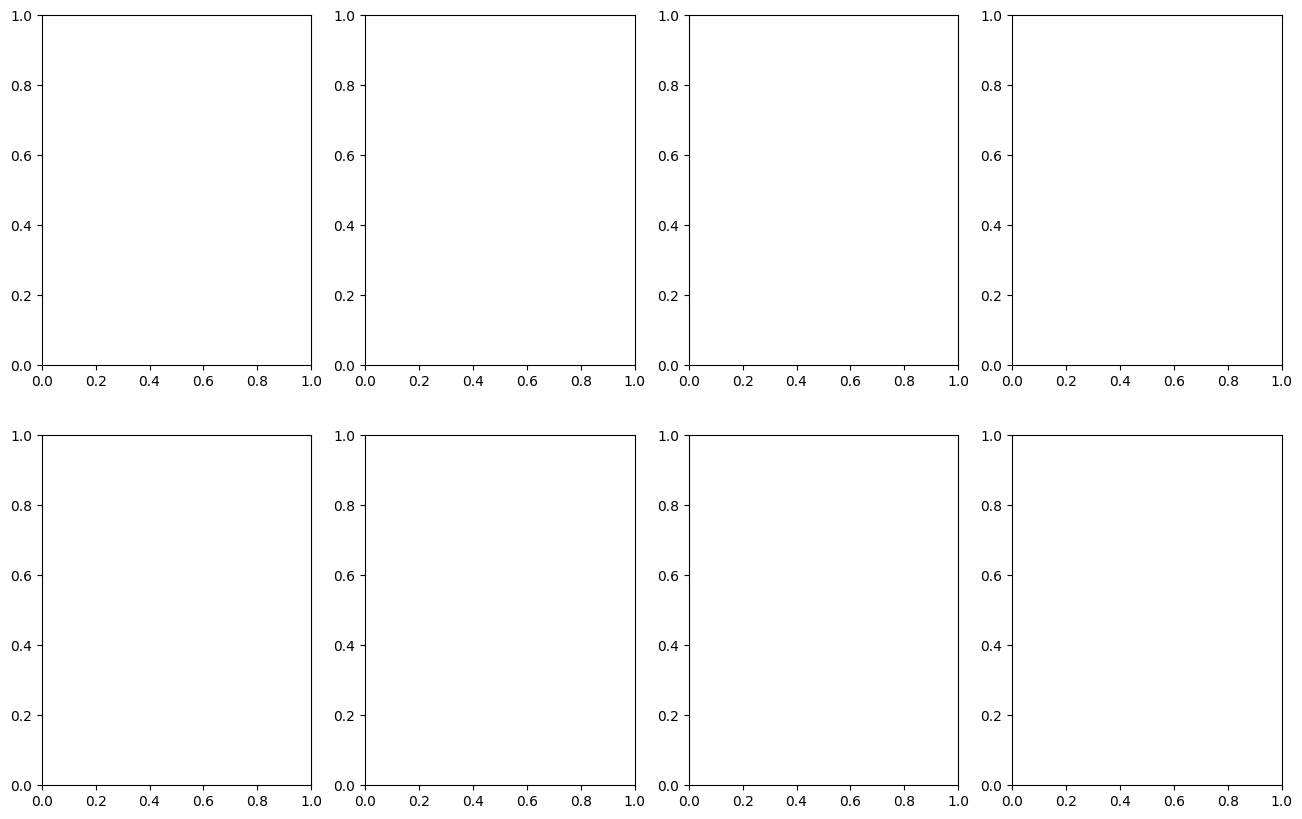

In [7]:
_ , ax = plt.subplots(2,4,figsize=(16,10))

In [8]:
for i in range(8) :
    data = train_dataset.__getitem__(np.random.choice(range(train_dataset.__len__())))

    image = data[0].cpu().detach().numpy().transpose(1,2,0) * 255
    image = image.astype(np.uint32)

    label = data[1]

    ax[i//4][i-(i//4)*4].imshow(image)
    ax[i//4][i-(i//4)*4].set_title(label)

plt.show()

IndexError: list index out of range